# Statistical Modeling - Challenge

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/fabian/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### The task:

Find a model that fits the gap minder 1985 babies per woman data better than our best model so far, region plus survival at age five, as judged, using our cross validation criteria. So the cross validation that you need to beat is a little more than one.

In [6]:
gapminder = pd.read_csv('05_08/gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

In [8]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving', 'babies_per_woman', c=colors, s=size, linewidth=0.5, edgecolor='k', alpha=0.5)

def plotfit(fit, data=gdata):
    plotdata(data)
    
    size, colors = sc(data)
    pp.scatter(data.age5_surviving, fit.predict(data), c=colors, s=30, linewidths=0.5, edgecolor='k', marker='D')

In [9]:
def cross_validate(data, formula, response, n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training = shuffled.iloc[:len(data)//2]

        testing = shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        
        df = len(testing) - trained.df_model - 1
        
        mse = np.sum(resid**2) / df
        
        ret.append(mse)
    
    return np.mean(ret)

In [10]:
f_surving = 'babies_per_woman ~ -1 + region + age5_surviving'

1.044363577265174

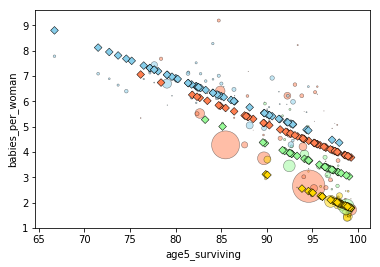

In [11]:
fit = smf.ols(f_surving, gdata).fit()
plotfit(fit, gdata)
cross_validate(gdata, f_surving, 'babies_per_woman')

#### Improvement

***1.*** Using power laws:

1.0306707270343884

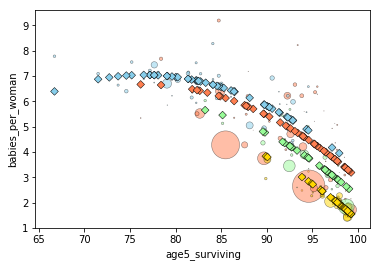

In [14]:
formula = 'babies_per_woman ~ -1 + region + age5_surviving + pow(age5_surviving,2)'
fit = smf.ols(formula, gdata).fit()
plotfit(fit, gdata)
cross_validate(gdata, f_surving, 'babies_per_woman')

***2.*** Adding a new column:

In [15]:
gdata['age5_surviving'] = gdata.age5_surviving**2

/Users/fabian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


This modifies the subset and not the original gapminder so we can apply this to solve our problem.